# Heart Disease Prediction
Mengyang He and Milo Yen-Goossens

In [2]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
data = pd.read_csv('./cardio_train.csv',sep=";")
df = pd.DataFrame(data)
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [4]:
df.drop(columns=['id'],inplace=True)
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [5]:
# check if the dataset has null or missing value
df.isnull().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [6]:
# add bmi feature
bmi = df['weight'].div(df['height'].multiply(df['height'])) * 100
df['bmi'] = bmi

In [7]:
df_normalized = df.copy()
for var in ['age', 'height', 'weight', 'ap_hi', 'ap_lo']:
  print(var + " mean, avg: " + str(df[var].mean()) + ", " + str(df[var].std()))
  df_normalized[var] = df[var] - df[var].mean()
  df_normalized[var] = df_normalized[var].div(df[var].std())

df_normalized

age mean, avg: 19468.865814285713, 2467.251667241401
height mean, avg: 164.35922857142856, 8.210126364538038
weight mean, avg: 74.20569, 14.39575667851138
ap_hi mean, avg: 128.8172857142857, 154.01141945609137
ap_lo mean, avg: 96.63041428571428, 188.47253029639026


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,-0.436058,2,0.443449,-0.847867,-0.122181,-0.088238,1,1,0,0,1,0,0.219671
1,0.307684,1,-1.018161,0.749826,0.072610,-0.035180,3,1,0,0,1,1,0.349277
2,-0.247995,1,0.078046,-0.708937,0.007679,-0.141296,3,1,0,0,0,1,0.235078
3,-0.748147,2,0.565250,0.541431,0.137540,0.017878,1,1,0,0,1,1,0.287105
4,-0.808538,1,-1.018161,-1.264657,-0.187111,-0.194354,1,1,0,0,0,0,0.230112
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,-0.092761,2,0.443449,0.124642,-0.057251,-0.088238,1,1,1,0,1,0,0.269274
69996,1.269483,1,-0.774559,3.597887,0.072610,-0.035180,2,2,0,0,1,1,0.504727
69997,-0.163285,2,2.270461,2.139124,0.332331,-0.035180,3,1,0,1,0,1,0.313536
69998,1.200580,1,-0.165555,-0.153218,0.040145,-0.088238,1,2,0,0,0,1,0.270993


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
from sklearn.metrics import det_curve
from sklearn.model_selection import cross_val_score

def accuracy_metrics(y, predictions):
  pos = 0
  neg = 0
  truePos = 0
  trueNeg = 0
  falsePos = 0
  falseNeg = 0

  for i in range(len(y)):
    if predictions[i] == 1:
      if y[i] == 1:
        pos += 1
        truePos += 1
      else:
        neg += 1
        falsePos += 1
    else:
      if y[i] == 1:
        pos += 1
        falseNeg += 1
      else:
        neg += 1
        trueNeg += 1

  return (truePos / pos, trueNeg / neg, falsePos / neg, falseNeg / pos)


print(accuracy_metrics([1, 0, 1, 1, 0], [1, 1, 0, 0, 0]))

(0.3333333333333333, 0.5, 0.5, 0.6666666666666666)


In [9]:
# K-NN - data setup

from sklearn.neighbors import KNeighborsClassifier

neighbors = range(50, 121, 5)
knn_scores = [0] * len(neighbors)
knn_false_pos = [0] * len(neighbors)
knn_false_neg = [0] * len(neighbors)
# folds = 5

knn_X = df_normalized.drop(columns=['cardio', 'height', 'weight', 'gender', 'alco', 'gluc', 'active', 'smoke'])
knn_y = df_normalized['cardio'].values

knn_X_train, knn_X_test, knn_y_train, knn_y_test = train_test_split(knn_X, knn_y, test_size=0.2, random_state=1, stratify=knn_y)

In [10]:
# train K-NN model - this block should take ~45 seconds

for i in range(len(neighbors)):
  knn = KNeighborsClassifier(n_neighbors = neighbors[i])
  
  knn.fit(knn_X_train, knn_y_train)
  knn_scores[i] = knn.score(knn_X_test, knn_y_test)

  # precision is percent of correct positive classifications (higher precision => fewer false positives)
  # knn_false_pos[i], knn_false_neg[i], temp = det_curve(knn_y_test, knn.predict(knn_X_test))
  temp, temp, knn_false_pos[i], knn_false_neg[i] = accuracy_metrics(knn_y_test, knn.predict(knn_X_test))

  # CODE FOR K-FOLD CV (takes too long to run):
  # score = cross_val_score(knn, knn_X, knn_y, cv=folds)
  # scores[i] = np.mean(score)

bestK = knn_scores.index(max(knn_scores))
print(f'Best-performing k value: {neighbors[bestK]}, accuracy: {knn_scores[bestK]}')

knnBestFalsePos = knn_false_pos.index(min(knn_false_pos))
print(f'K value with best false positive rate (FPR)): {neighbors[knnBestFalsePos]}, FPR: {knn_false_pos[knnBestFalsePos]}')

knnBestFalseNeg = knn_false_neg.index(min(knn_false_neg))
print(f'K value with best false negative rate (FNR): {neighbors[knnBestFalseNeg]}, FNR: {knn_false_neg[knnBestFalseNeg]}')

Best-performing k value: 80, accuracy: 0.7336428571428572
K value with best false positive rate (FPR)): 80, FPR: 0.21616219303255282
K value with best false negative rate (FNR): 55, FNR: 0.3096054888507719


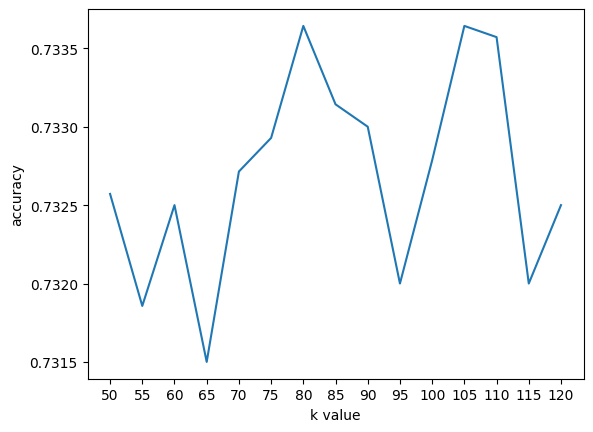

In [11]:
# K-NN accuracy plot

plt.xlabel('k value')
plt.ylabel('accuracy')
plt.plot(knn_scores, label='accuracy')
plt.xticks(range(len(neighbors)), neighbors)
plt.show()

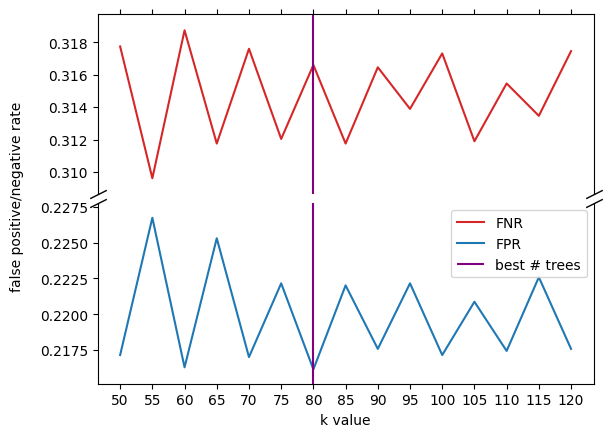

In [12]:
# K-NN false positive/negative plot

'''
READ: commented code below plots data on top of each other w/ separate y axes 
   run this commented code instead if the uncommented code results in a weird-looking graph
'''
# fig, ax1 = plt.subplots()

# color = 'tab:blue'
# ax1.set_ylabel('false positive rate', color=color)
# ax1.set_xlabel('k value')
# ax1.plot(knn_false_pos, label='FPR', color=color)
# ax1.tick_params(axis='y', labelcolor=color)

# ax2 = ax1.twinx()

# color = 'tab:red'
# ax2.set_ylabel('false negative rate', color=color)
# ax2.plot(knn_false_neg, label='FNR', color=color)
# ax2.tick_params(axis='y', labelcolor=color)

# plt.xticks(range(len(neighbors)), neighbors)
# plt.show()


'''
broken axis code from https://matplotlib.org/stable/gallery/subplots_axes_and_figures/broken_axis.html
'''

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
fig.subplots_adjust(hspace=0.05)  # adjust space between axes

ax1.plot(knn_false_neg, label='FNR', color='tab:red')
ax2.plot(knn_false_pos, label='FPR', color='tab:blue')

ax2.set_xlabel('k value')
ax2.set_ylabel('false positive/negative rate')
ax2.yaxis.set_label_coords(0.01, 0.5, transform=fig.transFigure)

ax1.set_ylim(min(knn_false_neg) - .001, max(knn_false_neg) + .001)
ax2.set_ylim(min(knn_false_pos) - .001, max(knn_false_pos) + .001)

ax1.spines.bottom.set_visible(False)
ax2.spines.top.set_visible(False)

ax1.xaxis.tick_top()
ax1.tick_params(labeltop=False)  # don't put tick labels at the top
ax2.xaxis.tick_bottom()

# axis break
d = .5  # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax1.plot([0, 1], [0, 0], transform=ax1.transAxes, **kwargs)
ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)

ax1.vlines(x=bestK, ymin=0, ymax=1, colors='purple')
ax2.vlines(x=bestK, ymin=0, ymax=1, colors='purple', label='best # trees')

# makes joint legend for two axes: from https://stackoverflow.com/questions/5484922/secondary-axis-with-twinx-how-to-add-to-legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=1)

plt.xticks(range(len(neighbors)), neighbors)
plt.show()

In [13]:
from sklearn.ensemble import RandomForestClassifier


# interesting to see how Random Forest handles continuous variables

# can test different max_depth= values

trees = range(60, 151, 10)
rf_scores = [0] * len(trees)
rf_false_pos = [0] * len(trees)
rf_false_neg = [0] * len(trees)

rf_X = df_normalized.drop(columns=['cardio'])
rf_y = df_normalized['cardio'].values

rf = [None] * len(trees)

rf_X_train, rf_X_test, rf_y_train, rf_y_test = train_test_split(rf_X, rf_y, test_size=0.2, random_state=1, stratify=knn_y)

In [14]:
# train random forest models, find best tree depth - this code block may take a couple minutes

for i in range(len(trees)):
  rf[i] = RandomForestClassifier(n_estimators=trees[i])
  
  rf[i].fit(rf_X_train, rf_y_train)
  rf_scores[i] = rf[i].score(rf_X_test, rf_y_test)

  temp, temp, rf_false_pos[i], rf_false_neg[i] = accuracy_metrics(rf_y_test, rf[i].predict(rf_X_test))

  # CODE FOR K-FOLD CV (takes too long to run):
  # score = cross_val_score(rf, rf_X, rf_y, cv=folds)
  # scores[i] = np.mean(score)

bestTreeNum = rf_scores.index(max(rf_scores))
print(f'Best-performing # trees: {trees[bestTreeNum]}, accuracy: {rf_scores[bestTreeNum]}')

rfBestFalsePos = rf_false_pos.index(min(rf_false_pos))
print(f'Tree num with best false positive rate (FPR): {trees[rfBestFalsePos]}, FPR: {rf_false_pos[rfBestFalsePos]}')

rfBestFalseNeg = rf_false_neg.index(min(rf_false_neg))
print(f'Tree num with best false negative rate (FNR): {trees[rfBestFalseNeg]}, FNR: {rf_false_neg[rfBestFalseNeg]}')

Best-performing # trees: 100, accuracy: 0.7175
Tree num with best false positive rate (FPR): 100, FPR: 0.26941747572815533
Tree num with best false negative rate (FNR): 100, FNR: 0.29559748427672955


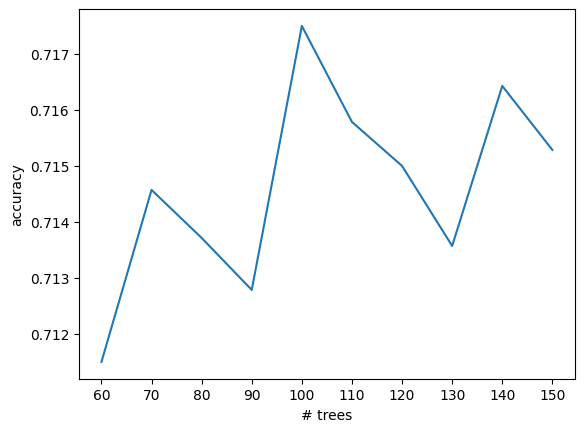

In [15]:
plt.xlabel('# trees')
plt.ylabel('accuracy')
plt.plot(rf_scores)
plt.xticks(range(len(trees)), trees)
plt.show()

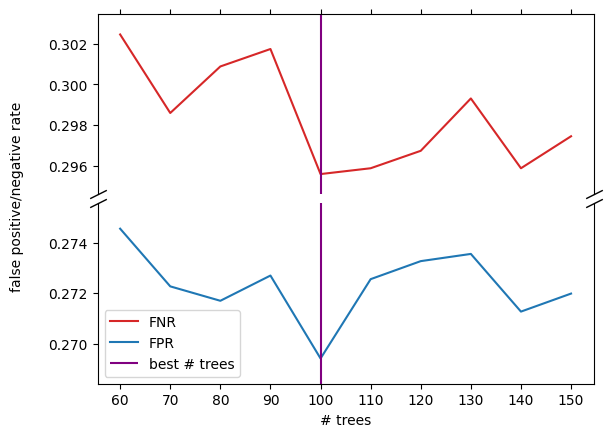

In [16]:
# Random Forest false positive/negative plot

'''
READ: commented code below plots data on top of each other w/ separate y axes 
   run this commented code instead if the uncommented code results in a weird-looking graph
'''

# fig, ax1 = plt.subplots()

# color = 'tab:blue'
# ax1.set_ylabel('false positive rate', color=color)
# ax1.set_xlabel('# trees')
# ax1.plot(rf_false_pos, label='FPR', color=color)
# ax1.tick_params(axis='y', labelcolor=color)

# ax2 = ax1.twinx()

# color = 'tab:red'
# ax2.set_ylabel('false negative rate', color=color)
# ax2.plot(rf_false_neg, label='FNR', color=color)
# ax2.tick_params(axis='y', labelcolor=color)

# plt.xticks(range(len(trees)), trees)
# plt.show()

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
fig.subplots_adjust(hspace=0.05)  # adjust space between axes

ax1.plot(rf_false_neg, label='FNR', color='tab:red')
ax2.plot(rf_false_pos, label='FPR', color='tab:blue')

ax2.set_xlabel('# trees')
ax2.set_ylabel('false positive/negative rate')
ax2.yaxis.set_label_coords(0.01, 0.5, transform=fig.transFigure)

ax1.set_ylim(min(rf_false_neg) - .001, max(rf_false_neg) + .001)
ax2.set_ylim(min(rf_false_pos) - .001, max(rf_false_pos) + .001)

ax1.spines.bottom.set_visible(False)
ax2.spines.top.set_visible(False)

ax1.xaxis.tick_top()
ax1.tick_params(labeltop=False)  # don't put tick labels at the top
ax2.xaxis.tick_bottom()

# axis break
d = .5  # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax1.plot([0, 1], [0, 0], transform=ax1.transAxes, **kwargs)
ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)

ax1.vlines(x=bestTreeNum, ymin=0, ymax=1, colors='purple')
ax2.vlines(x=bestTreeNum, ymin=0, ymax=1, colors='purple', label='best # trees')

# makes joint legend for two axes: from https://stackoverflow.com/questions/5484922/secondary-axis-with-twinx-how-to-add-to-legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)

plt.xticks(range(len(trees)), trees)
plt.show()

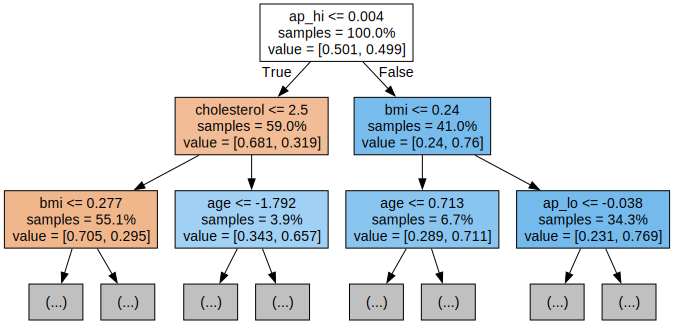

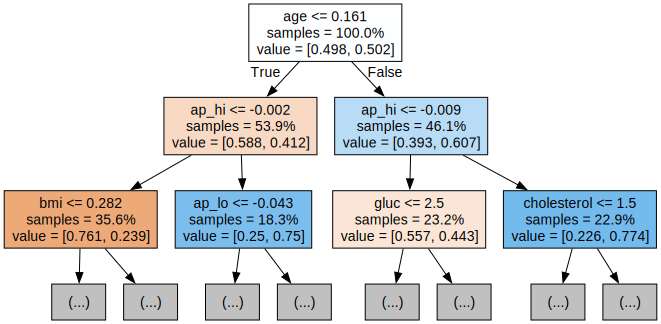

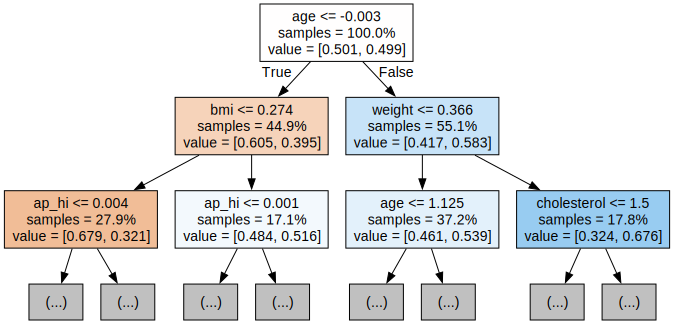

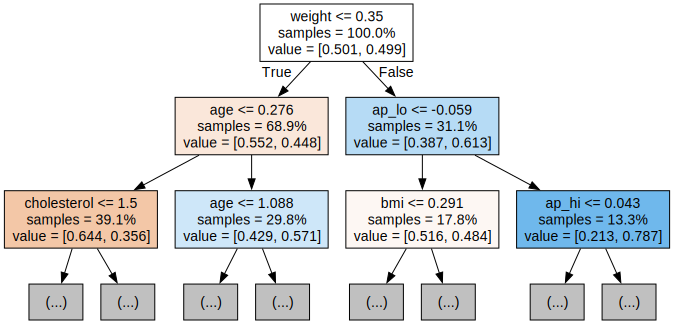

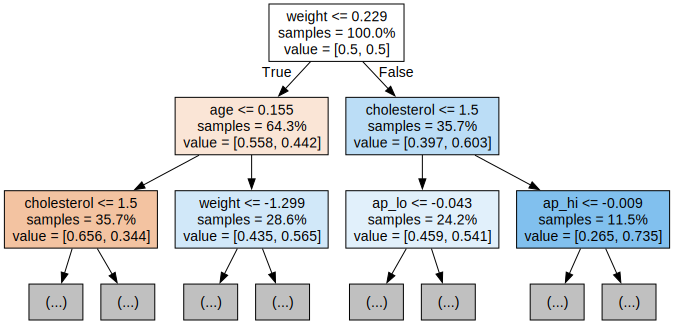

In [17]:
# tree visualization code from https://www.datacamp.com/tutorial/random-forests-classifier-python

from sklearn.tree import export_graphviz
import graphviz

for i in range(5):
  tree = rf[bestTreeNum].estimators_[i]
  dot_data = export_graphviz(tree,
                             feature_names=rf_X_train.columns,
                             filled=True,
                             max_depth=2,
                             impurity=False,
                             proportion=True)
  graph = graphviz.Source(dot_data)
  display(graph)

In [18]:
# Gaussian Naive Bayes 
# Gaussian NB can handle continuous variables, represent probability of a variable
#   based on normal distribution

from sklearn.naive_bayes import GaussianNB

# which hyperparameters to tune??

# maybe try training on a small subset of data, like 500 or 1000 books
#   if works well, application is that could be useful for training geographically localized NB 
#   models, so hospitals in regions with limited data can still build strong prediction models 
#   that are specific to that region

# try testing for false positives vs. false negatives (if false pos account for most of inaccurate
#   predictions, that is probably better than having lots of false negatives?)
#   - or could just give us more insight if we have both false positive and false negative data

var_smoothing_vals = np.logspace(-9, 0, num=100) # range(100, 125, 4)
nb_scores = [0] * len(var_smoothing_vals)
nb_false_pos = [0] * len(var_smoothing_vals)
nb_false_neg = [0] * len(var_smoothing_vals)

nb_X = df.drop(columns=['cardio'])
nb_y = df_normalized['cardio'].values

nb = [None] * len(var_smoothing_vals)

nb_X_train, nb_X_test, nb_y_train, nb_y_test = train_test_split(nb_X, nb_y, test_size=0.2, random_state=1, stratify=knn_y)

In [19]:
# train Gaussian Naive Bayes models - this block should take only a few seconds

for i in range(len(var_smoothing_vals)):
  nb[i] = GaussianNB(var_smoothing=var_smoothing_vals[i])
  
  nb[i].fit(nb_X_train, nb_y_train)
  nb_scores[i] = nb[i].score(nb_X_test, nb_y_test)

  # precision is percent of correct positive classifications (higher precision => fewer false positives)
  # nb_false_pos[i], nb_false_neg[i], temp = det_curve(nb_y_test, nb.predict(nb_X_test))
  temp, temp, nb_false_pos[i], nb_false_neg[i] = accuracy_metrics(nb_y_test, nb[i].predict(nb_X_test))

  # CODE FOR K-FOLD CV (takes too long to run):
  # score = cross_val_score(nb, nb_X, nb_y, cv=folds)
  # scores[i] = np.mean(score)

bestVarSmoothing = nb_scores.index(max(nb_scores))
print(f'Best-performing var smoothing val: {var_smoothing_vals[bestVarSmoothing]}, accuracy: {nb_scores[bestVarSmoothing]}')

nbBestFalsePos = nb_false_pos.index(min(nb_false_pos))
print(f'Var smoothing value with lowest false positive rate (FPR): {var_smoothing_vals[nbBestFalsePos]}, FPR: {nb_false_pos[nbBestFalsePos]}')

nbBestFalseNeg = nb_false_neg.index(min(nb_false_neg))
print(f'Var smoothing value with lowest false negative rate (FNR): {var_smoothing_vals[nbBestFalseNeg]}, FNR: {nb_false_neg[nbBestFalseNeg]}')

Best-performing var smoothing val: 0.01519911082952933, accuracy: 0.6056428571428571
Var smoothing value with lowest false positive rate (FPR): 0.0002848035868435805, FPR: 0.004283266704740148
Var smoothing value with lowest false negative rate (FNR): 1.0, FNR: 0.34705546026300743


<function matplotlib.pyplot.show(close=None, block=None)>

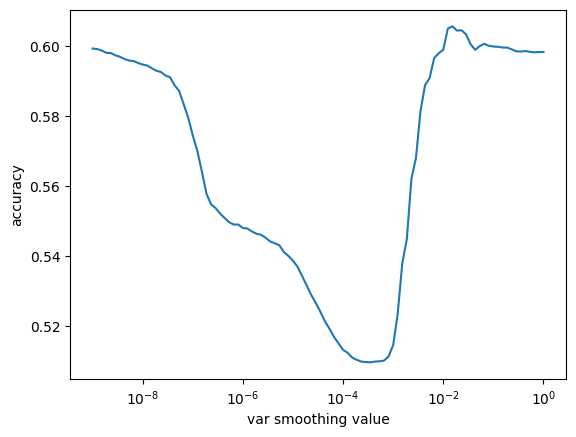

In [20]:
# plot NB accuracy

fig, ax = plt.subplots(1,1)
ax.set_xscale('log')
ax.set_xlabel('var smoothing value')
ax.set_ylabel('accuracy')
ax.plot(var_smoothing_vals, nb_scores)
plt.show

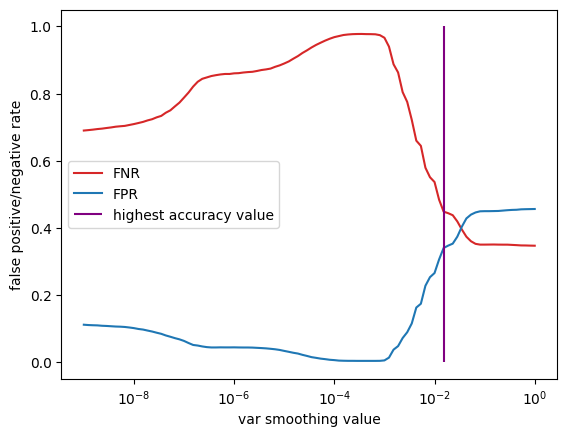

In [22]:
# Naive Bayes false positive/negative plot

# ax = plt.axes(xscale='log')
fig, ax = plt.subplots(1, 1)

ax.set_xscale('log')
ax.set_xlabel('var smoothing value')
ax.set_ylabel('false positive/negative rate')

ax.plot(var_smoothing_vals, nb_false_neg, label='FNR', color='tab:red')
ax.plot(var_smoothing_vals, nb_false_pos, label='FPR', color='tab:blue')

ax.vlines(x = var_smoothing_vals[bestVarSmoothing], ymin=0, ymax=1, colors='purple', label='highest accuracy value')

ax.legend()
plt.show()
